Link of Dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

Downloading the Dataset

In [5]:
!kaggle datasets download -d lasaljaywardena/pneumonia-chest-x-ray-dataset

100% 1.14G/1.14G [00:53<00:00, 23.8MB/s]
100% 1.14G/1.14G [00:53<00:00, 22.8MB/s]


In [ ]:
! unzip /content/pneumonia-chest-x-ray-dataset.zip

Importing the Required Libraries

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Pre Processing

In [8]:
test_path = '/content/test/'
train_path = '/content/train/'
val_path = '/content/val/'

# Since Validation set contains only a handful of data points so I am not including it in Model training.
# I will use data from this set to test our model as an external source after testing the model with test set data.

In [9]:
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.12,
                                zoom_range = 0.1,
                                fill_mode='nearest',
                                horizontal_flip = True)

# The reason for including Validation_split = 0.12,
# instead of traditional value of 0.2 or 0.3 is to match its value as close as possible to test set.

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_path,
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 46,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_path,
                                                      target_size = (150, 150),
                                                      subset = "validation",
                                                      batch_size = 46,
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_path,
                                               target_size = (150, 150),
                                               batch_size = 46,
                                               class_mode = "binary")

Found 4591 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'normal': 0, 'pneumonia': 1}
Image shape is :  (150, 150, 3)


Building the Model

In [11]:
# Building the CNN Model

model = Sequential()

# Adding First Convolutional and Pooling Layer
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer to avoid Overfitting
model.add(Dropout(0.4))

# Adding Second Convolutional and Pooling Layer
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer to avoid Overfitting
model.add(Dropout(0.4))

# Flatten the Image
model.add(Flatten())

# Adding Dense and Dropout layers
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.4))
model.add(Dense(32, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

# Getting Summary and compiling the model
model.summary()

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [12]:
history = model.fit(train_generator,
                    epochs = 10,
                    validation_data = validation_generator)

Epoch 1/10
100/100 [==============================] - 87s 726ms/step - loss: 0.6055 - accuracy: 0.7345 - val_loss: 0.5856 - val_accuracy: 0.7440
Epoch 2/10
100/100 [==============================] - 69s 691ms/step - loss: 0.4796 - accuracy: 0.7617 - val_loss: 0.3251 - val_accuracy: 0.8624
Epoch 3/10
100/100 [==============================] - 68s 676ms/step - loss: 0.3423 - accuracy: 0.8623 - val_loss: 0.4417 - val_accuracy: 0.8112
Epoch 4/10
100/100 [==============================] - 71s 715ms/step - loss: 0.2732 - accuracy: 0.8972 - val_loss: 0.2557 - val_accuracy: 0.8912
Epoch 5/10
100/100 [==============================] - 69s 693ms/step - loss: 0.1939 - accuracy: 0.9275 - val_loss: 0.2781 - val_accuracy: 0.8880
Epoch 6/10
100/100 [==============================] - 69s 690ms/step - loss: 0.1826 - accuracy: 0.9336 - val_loss: 0.2483 - val_accuracy: 0.9024
Epoch 7/10
100/100 [==============================] - 67s 674ms/step - loss: 0.1719 - accuracy: 0.9357 - val_loss: 0.1869 - val_ac

Training Accuracy: 94.05%
Validation Accuracy: 91.68%

Point to note: The low difference between training and validation accuracy is telling that our model isn't overfitted the training data and trained properly.

Now, Let's graph our Lossess and Accuracy.

Text(0.5, 0, 'epoch')

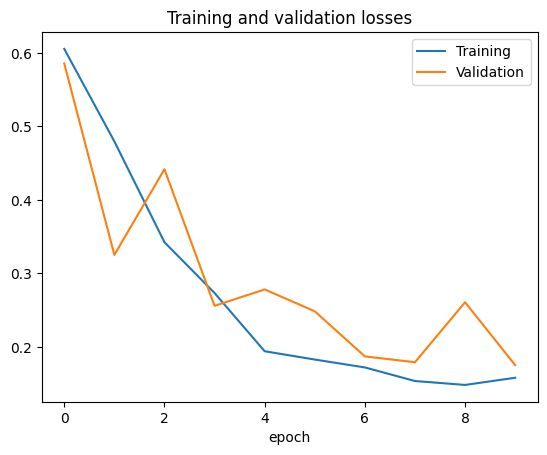

In [13]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

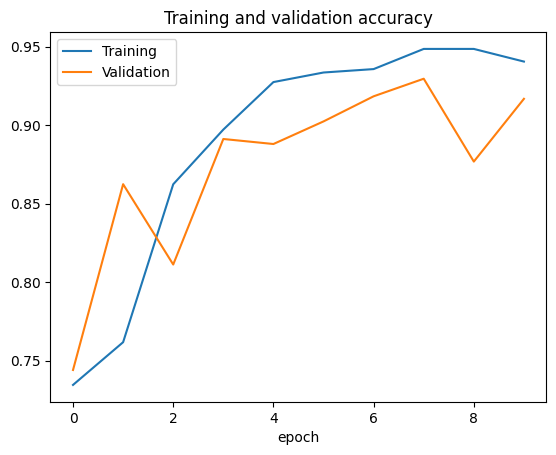

In [14]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [15]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

14/14 [==============================] - 4s 322ms/step - loss: 0.5628 - accuracy: 0.8253
Test Set Loss :  0.5627773404121399
Test Set Accuracy :  0.8253205418586731


We are getting around 82.53% of accuracy on test set which is quite a good score.

Let's test out model on one of the example from Val set.

In [16]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)

  if prediction == 0:
    print("The report is Normal")
  else:
    print("The report is Pneumonia Positive")

Saving person1949_bacteria_4880.jpeg to person1949_bacteria_4880.jpeg
1/1 [==============================] - 0s 296ms/step
The report is Pneumonia Positive


Saving our model

In [17]:
model.save("Pnuemonia_prediction_model.h5")